# Model

$H = \frac{p ^ 2}{2 m} + g (x ^ 2 - x _ 0 ^ 2) ^ 2$

## Fit dependence with

$\langle q^2 \rangle = A e ^ {-B N _ s ^ C} + D$

$\langle V(q) \rangle = A e ^ {-B N _ s ^ C} + D$

$\langle K(p) \rangle = A e ^ {-B N _ s ^ C} + D$

## Lattice size

N = 256

## General parameters and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import kv

d = 1
N = 256
m = 1.000000
g = 1
x0 = 1.414214
beta = 64
Np = 256
Na = 8
tau = beta / N

def f(x, a, b, c, d):
    return a * np.exp(-b * x ** c) + d

def GetStr(number):
    number = 1.0 * number
    return str(number).split('.')[0] + '.' + str(number).split('.')[1] + '0' * (6 - len(str(number).split('.')[1]))

def GetX2(path : list) -> float:
    mean = 0
    for point in path:
        for dimension in range(d):
            mean += point[dimension] ** 2 / N
    return mean

def GetV(path : list) -> float:
    mean = 0
    for point in path:
        Q = 0
        for dimension in range(d):
            Q += point[dimension] ** 2
        mean += g * (Q - x0 ** 2) ** 2 / N
    return mean

def GetK(path : list) -> float:
    mean = 0
    for index in range(len(path)):
        prev = len(path) - 1 if index == 0 else index - 1
        Q = 0
        for dimension in range(d):
            Q += (path[index][dimension] - path[prev][dimension]) ** 2
        mean += (1 / (2 * tau) - m * Q / (2 * tau ** 2)) / N
    return mean

x2_a = []
v_a = []
k_a = []

/var/folders/sf/z2_k64nn16l9x71mf6mwhs6h0000gn/T/ipykernel_71094/706097690.py:17: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x ** c) + d
/var/folders/sf/z2_k64nn16l9x71mf6mwhs6h0000gn/T/ipykernel_71094/706097690.py:17: RuntimeWarning: divide by zero encountered in power
  return a * np.exp(-b * x ** c) + d
/Users/a017/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



x2

[[1.0, 0.13311479998703954, 0.0011542640836335427], [2.0, 0.24080545945654314, 0.001762007391802306], [4.0, 0.42936577511888785, 0.0031789944368575394], [8.0, 0.7332009668033974, 0.004681983632591479], [16.0, 1.1282069998621749, 0.006323727938127794], [32.0, 1.3620109187696179, 0.006631330074741211], [64.0, 1.4739757094833719, 0.006754613482149177], [128.0, 1.5323563364710684, 0.006216896824522233], [256.0, 1.5862161546034574, 0.005797961770122367], [512.0, 1.6057666515597822, 0.006179314894388055], [1024.0, 1.626041611015113, 0.006630434977269358], [2048.0, 1.6485531532950637, 0.005554072218347243], [4096.0, 1.6369157732604518, 0.007092802366890975], [8192.0, 1.647993286221102, 0.006458018484502408], [16384.0, 1.6523960086507612, 0.0061692271875900635]]

Fit parameters

[-1.4899951034980914, 0.05322878783331993, 2.123486329379083, 1.6289143247657236]

Fit covariance

[0.0007481741496358954, 8.007822132992486e-05, 0.012967407523004943, 0.0001267400410396577]


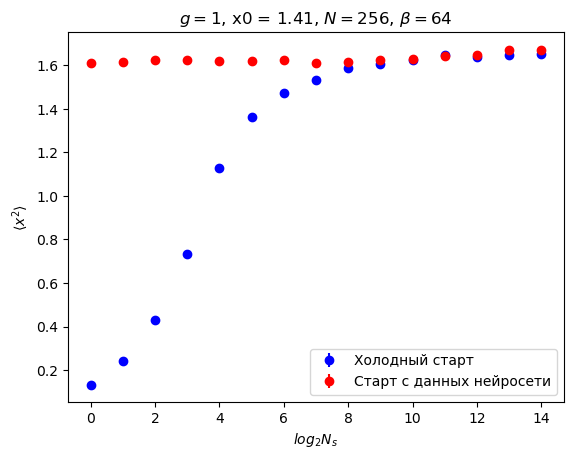


V

[[1.0, 3.54938708350139, 0.0033385278307061193], [2.0, 3.2303641740446642, 0.004496367313199836], [4.0, 2.7588151263634293, 0.007067221200131073], [8.0, 2.1722851848373192, 0.008104216376967281], [16.0, 1.614011977996761, 0.008657137158413545], [32.0, 1.3265712653138966, 0.008011771822885547], [64.0, 1.200522452671272, 0.008264066058356409], [128.0, 1.1521555434551578, 0.00691148099840995], [256.0, 1.0976694485337695, 0.007230403144196948], [512.0, 1.0564499122412168, 0.006422856455771234], [1024.0, 1.0323978264999287, 0.007381247626309867], [2048.0, 1.0126465496527093, 0.00634979167513741], [4096.0, 1.019676371660883, 0.007129225134727646], [8192.0, 1.009097982266051, 0.006253073360315731], [16384.0, 0.9958190571371202, 0.006158897555323121]]

Fit parameters

[2.5034429074934907, 0.11240814496696722, 1.802806642659066, 1.032751615743649]

Fit covariance

[0.0015877780072230169, 0.0001466478284914426, 0.0062834660571495496, 0.00022434531963228495]


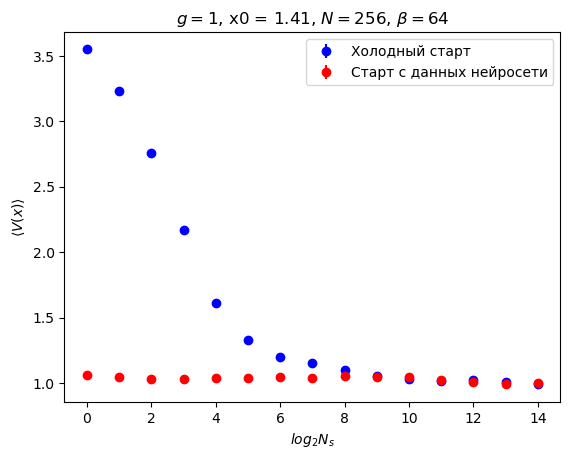


K

[[1.0, 0.6584993430116046, 0.00882522024148375], [2.0, 0.21653367616398272, 0.010900768917430009], [4.0, -0.05829053910629582, 0.011264169758708207], [8.0, -0.12411173119764672, 0.012412067581778092], [16.0, 0.025374837160780074, 0.012189646520375573], [32.0, 0.22786430093356128, 0.01138450666147417], [64.0, 0.32884327815596925, 0.011715447464892345], [128.0, 0.4403594652855384, 0.009999926304228409], [256.0, 0.48714163380345704, 0.009611564269806335], [512.0, 0.5436736605875871, 0.00917656457408703], [1024.0, 0.5847568337709402, 0.010306440803109194], [2048.0, 0.6102153068655627, 0.009583605674614509], [4096.0, 0.6165617759610864, 0.009286196905346185], [8192.0, 0.6214092787132761, 0.008977343552377712], [16384.0, 0.6183425465028991, 0.009422340714381043]]

Fit parameters

[0.29145117704013884, 29.20161166859744, 4.021417000974945, 0.3670481659714709]

Fit covariance

[inf, inf, inf, inf]


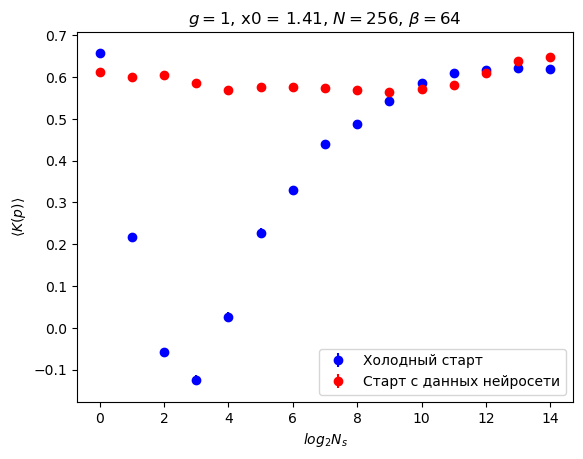

In [2]:
Number_of_cores = 64
Ns_max = 16384

mask = "_Cold_m=" + GetStr(m) + "_g=" + GetStr(g) + "_x0=" + GetStr(x0) + "_N=" + str(N) + "_Ns="
Ns_set = [2 ** i for i in range(int(np.log2(Ns_max)) + 1)]

x2_Ns = []
v_Ns = []
k_Ns = []
    
for Ns in Ns_set:
    paths = []
    x2 = []
    v = []
    k = []
    for rank in range(Number_of_cores):
        file = open("Data/" + str(rank) + mask + str(Ns) + ".dat", "r")
        data = file.readlines()
        for line in data:
            path = np.array(list(map(float, line.split()))).reshape(N, d)
            paths.append(path)
        file.close()
    for path in paths:
        x2.append(GetX2(path))
        v.append(GetV(path))
        k.append(GetK(path))
    x2_Ns.append([Ns, np.mean(x2), np.std(x2) / ((N - 1) ** 0.5)])
    v_Ns.append([Ns, np.mean(v), np.std(v) / ((N - 1) ** 0.5)])
    k_Ns.append([Ns, np.mean(k), np.std(k) / ((N - 1) ** 0.5)])

x2_Ns = np.array(x2_Ns)
v_Ns = np.array(v_Ns)
k_Ns = np.array(k_Ns)

popt_x2, pcov_x2 = curve_fit(f, np.log2(x2_Ns[:, 0]), x2_Ns[:, 1])
popt_v, pcov_v = curve_fit(f, np.log2(v_Ns[:, 0]), v_Ns[:, 1])
popt_k, pcov_k = curve_fit(f, np.log2(k_Ns[:, 0]), k_Ns[:, 1])

x2_Ns_Warm = []
v_Ns_Warm = []
k_Ns_Warm = []

mask_warm = "_Warm_m=" + GetStr(m) + "_g=" + GetStr(g) + "_x0=" + GetStr(x0) + "_N=" + str(N) + "_Ns="
Ns_set = [2 ** i for i in range(int(np.log2(Ns_max)) + 1)]

for Ns in Ns_set:
    paths = []
    x2 = []
    v = []
    k = []
    for rank in range(Number_of_cores):
        file = open("Data/" + str(rank) + mask_warm + str(Ns) + ".dat", "r")
        data = file.readlines()
        for line in data:
            path = np.array(list(map(float, line.split()))).reshape(N, d)
            paths.append(path)
        file.close()
    for path in paths:
        x2.append(GetX2(path))
        v.append(GetV(path))
        k.append(GetK(path))
    x2_Ns_Warm.append([Ns, np.mean(x2), np.std(x2) / ((N - 1) ** 0.5)])
    v_Ns_Warm.append([Ns, np.mean(v), np.std(v) / ((N - 1) ** 0.5)])
    k_Ns_Warm.append([Ns, np.mean(k), np.std(k) / ((N - 1) ** 0.5)]) 

x2_Ns_Warm = np.array(x2_Ns_Warm)
v_Ns_Warm = np.array(v_Ns_Warm)
k_Ns_Warm = np.array(k_Ns_Warm)

print("\nx2\n")
print(x2_Ns.tolist())
print("\nFit parameters\n")
print(popt_x2.tolist())
print("\nFit covariance\n")
print(np.diag(pcov_x2).tolist())
plt.errorbar(x = np.log2(x2_Ns[:, 0]), y = x2_Ns[:, 1], yerr = x2_Ns[:, 2], fmt = "bo", label = "Холодный старт")
# plt.plot(np.log2(x2_Ns[:, 0]), f(np.log2(x2_Ns[:, 0]), *popt_x2), 'k--',
#          label=r'Fit: A=%5.3f, B=%5.6f, C=%5.3f, D=%5.3f' % tuple(popt_x2))
plt.errorbar(x = np.log2(x2_Ns_Warm[:, 0]), y = x2_Ns_Warm[:, 1], yerr = x2_Ns_Warm[:, 2], fmt = "ro", label = "Старт с данных нейросети")
plt.title(r"$g = $" + str(g) + r", x0 = " + str(1.41) + r", $N = $" + str(N) + r", $\beta = $" + str(beta))
plt.xlabel(r"$log_2 N_s$")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.legend()
plt.show()

print("\nV\n")
print(v_Ns.tolist())
print("\nFit parameters\n")
print(popt_v.tolist())
print("\nFit covariance\n")
print(np.diag(pcov_v).tolist())
plt.errorbar(x = np.log2(v_Ns[:, 0]), y = v_Ns[:, 1], yerr = v_Ns[:, 2], fmt = "bo", label = "Холодный старт")
# plt.plot(np.log2(v_Ns[:, 0]), f(np.log2(v_Ns[:, 0]), *popt_v), 'k--',
#          label=r'Fit: A=%5.3f, B=%5.6f, C=%5.3f, D=%5.3f' % tuple(popt_v))
plt.errorbar(x = np.log2(v_Ns_Warm[:, 0]), y = v_Ns_Warm[:, 1], yerr = v_Ns_Warm[:, 2], fmt = "ro", label = "Старт с данных нейросети")
plt.title(r"$g = $" + str(g) + r", x0 = " + str(1.41) + r", $N = $" + str(N) + r", $\beta = $" + str(beta))
plt.xlabel(r"$log_2 N_s$")
plt.ylabel(r"$\langle V(x) \rangle$")
plt.legend()
plt.show()

print("\nK\n")
print(k_Ns.tolist())
print("\nFit parameters\n")
print(popt_k.tolist())
print("\nFit covariance\n")
print(np.diag(pcov_k).tolist())
plt.errorbar(x = np.log2(k_Ns[:, 0]), y = k_Ns[:, 1], yerr = k_Ns[:, 2], fmt = "bo", label = "Холодный старт")
# plt.plot(np.log2(k_Ns[:, 0]), f(np.log2(k_Ns[:, 0]), *popt_k), 'k--',
#          label=r'Fit: A=%5.3f, B=%5.6f, C=%5.3f, D=%5.3f' % tuple(popt_k))
plt.errorbar(x = np.log2(k_Ns_Warm[:, 0]), y = k_Ns_Warm[:, 1], yerr = k_Ns_Warm[:, 2], fmt = "ro", label = "Старт с данных нейросети")
plt.title(r"$g = $" + str(g) + r", x0 = " + str(1.41) + r", $N = $" + str(N) + r", $\beta = $" + str(beta))
plt.xlabel(r"$log_2 N_s$")
plt.ylabel(r"$\langle K(p) \rangle$")
plt.legend()
plt.show()

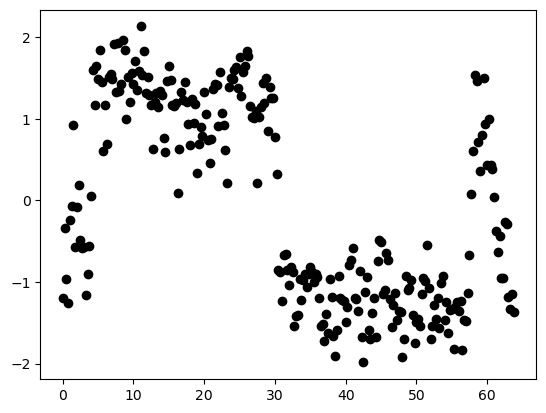

In [3]:
file = open("Data/" + str(5) + mask + str(16384) + ".dat", "r")
data = file.readlines()
y = np.array(list(map(float, data[0].split()))).reshape(N, d)
x = []
for i in range(N):
    x.append(i * tau)
plt.plot(x, y, "ko")
plt.show()

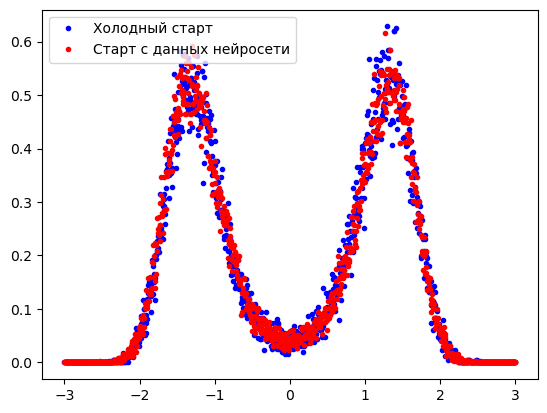

In [4]:
xmax = 3
delta = 0.006
rho = [0 for i in range(2 * int(xmax / delta) + 1)]
rho_warm = [0 for i in range(2 * int(xmax / delta) + 1)]
x = [i * delta - xmax for i in range(len(rho))]

for core in range(Number_of_cores):
    file = open("Data/" + str(core) + mask + str(16384) + ".dat", "r")
    data = file.readlines()


    for line in data:
        path = np.array(list(map(float, line.split()))).reshape(N, d)
        for point in path:
            index = int((xmax + point) / delta)
            rho[index] += 1 / (Number_of_cores * len(data) * len(path) * delta)

for core in range(Number_of_cores):
    file = open("Data/" + str(core) + mask_warm + str(16384) + ".dat", "r")
    data = file.readlines()


    for line in data:
        path = np.array(list(map(float, line.split()))).reshape(N, d)
        for point in path:
            index = int((xmax + point) / delta)
            rho_warm[index] += 1 / (Number_of_cores * len(data) * len(path) * delta)

plt.plot(x, rho, "b.", label = "Холодный старт")
plt.plot(x, rho_warm, "r.", label = "Старт с данных нейросети")
plt.legend()
plt.show()